<a href="https://colab.research.google.com/github/HenriqueHideaki/RepositorioInteligenciaArtificial/blob/main/Unidade%202/QUEST%C3%83O_01A_UNIDADE2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from numpy.linalg import norm
from itertools import product

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.layers import Dense, Reshape, Flatten, Dropout
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential
import tensorflow as tf

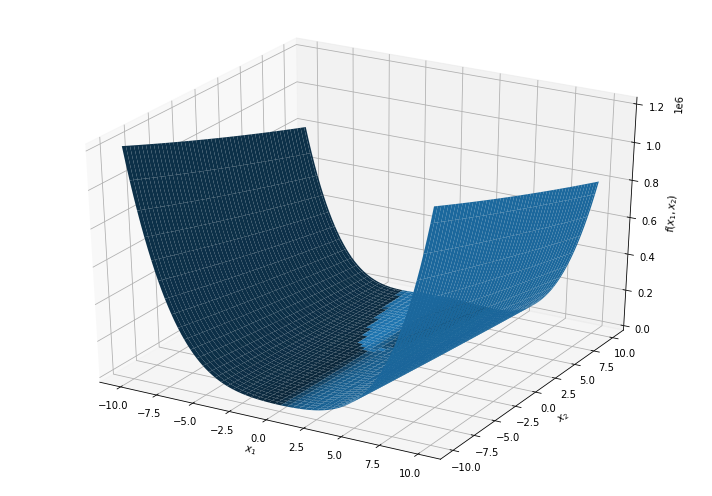

In [4]:
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(projection='3d'))

x1, x2 = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
z =  (1 - x1**2) + 100*((x2- (x1**2))**2)

ax.plot_surface(x1, x2, z)

ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='$f(x_1, x_2)$'
)

plt.tight_layout()
plt.show()

In [5]:
x_train, x_test, y_train, y_test = train_test_split(
    np.vstack([x1.flatten(), x2.flatten()]).T, 
    z.flatten(), 
    test_size=0.2, 
    random_state=505
)

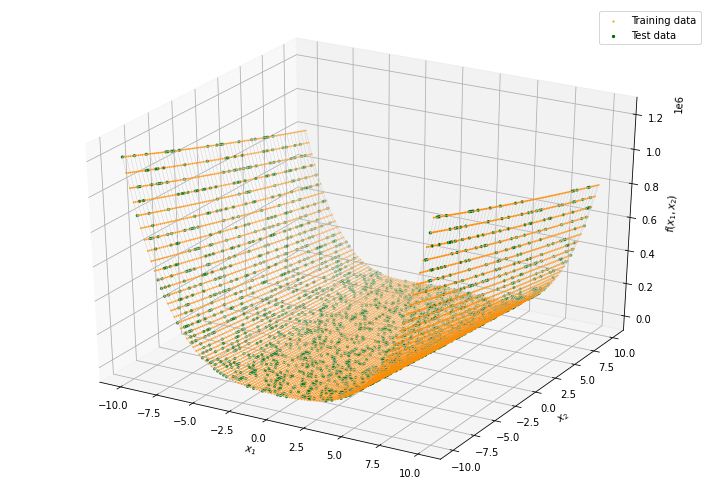

In [6]:
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(projection='3d'))

ax.plot_wireframe(x1, x2, z, linewidths=0.5, color='lightgrey')
ax.scatter(x_train[:,0], x_train[:,1], y_train, s=1, color='darkorange', label='Training data')
ax.scatter(x_test[:,0], x_test[:,1], y_test, s=5, color='darkgreen', label='Test data')

ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='$f(x_1, x_2)$'
)

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
mlp = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='linear')
])

mlp.compile(
    loss='mean_squared_error',
    optimizer='adam'
)

mlp.summary()

In [ ]:
history = mlp.fit(
    x_train, y_train,
    batch_size=8,
    epochs=2000,
    validation_split=0.1,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)
    ]
)


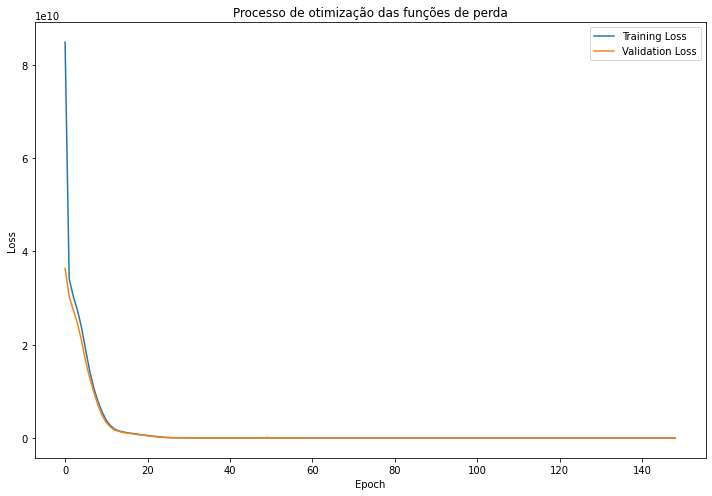

In [9]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(history.history['loss'], label='Training Loss')
ax.plot(history.history['val_loss'], label='Validation Loss')

ax.set(
    title='Processo de otimização das funções de perda',
    ylabel='Loss',
    xlabel='Epoch'
)

plt.legend()
plt.tight_layout()
plt.show()

63/63 [==============================] - 0s 1ms/step


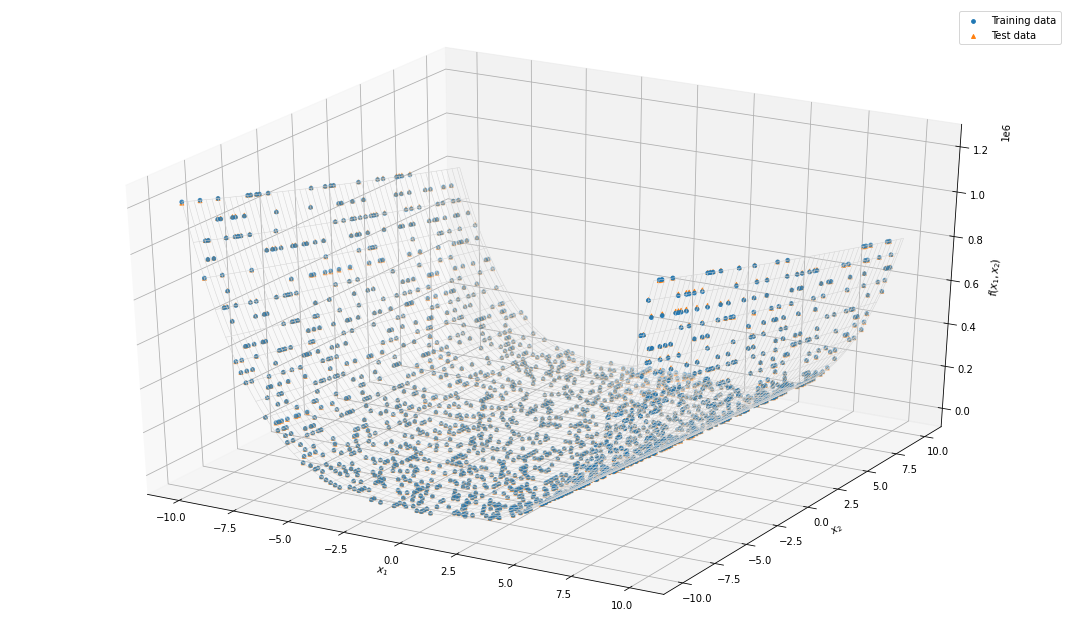

In [10]:
fig, ax = plt.subplots(figsize=(15, 9), subplot_kw=dict(projection='3d'))

ax.plot_wireframe(x1, x2, z, linewidths=0.5, color='lightgrey')
ax.scatter(x_test[:,0], x_test[:,1], y_test, s=14, color='C0', label='Training data')
ax.scatter(x_test[:,0], x_test[:,1], mlp.predict(x_test), s=15, marker='^', color='C1', label='Test data')

ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='$f(x_1, x_2)$'
)

plt.legend()
plt.tight_layout()
plt.show()